In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


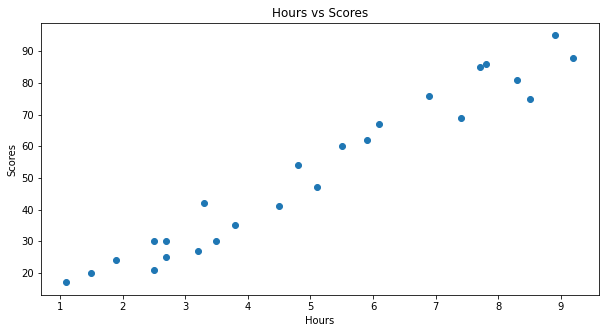

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(x='Hours',y='Scores',data=data)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score**

In [25]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print('training completed')


training completed


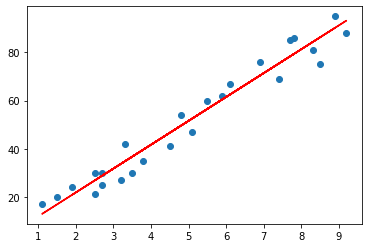

In [39]:
line=regressor.coef_*X_train+regressor.intercept_
plt.scatter(X,y)
plt.plot(X_train,line,'-r')
plt.show()

**Making Predictions**

In [34]:
y_test
y_pred=regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [36]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [37]:
hours=9.25
own_pred=regressor.predict([[hours]])
print('No of hours {}'.format(hours))
print('Predicted Score {}'.format(own_pred))

No of hours 9.25
Predicted Score [93.69173249]


**Evaluating the Performance of our Algorithm**

In [38]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
